In [30]:
# Importing relevant libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# The mean filter is defined
def mean_filter(img: np.ndarray, kernel_size: int) -> np.ndarray:
    """
    Applies a mean filter to an image

    Args:
        img (np.ndarray): The original image
        kernel_size (int): The size of the kernel that will pass through the image

    Returns: 
        np.ndarray: The filtered image
    """
    
    # The new image is created
    new_image = np.zeros(img.shape, dtype=np.float64)

    # The padding size is defined and a padded image created by replication of the pixel
    # values on the edge of the image
    padding_size = kernel_size // 2
    padded_img = np.pad(img, padding_size, mode = 'edge')

    # Now the filtering operation is performed by sliding the kernel across the padded image
    # and calculating the mean of that region
    rows, columns = img.shape
    for r in range(rows):
        for c in range(columns):
            neighbourhood = padded_img[r: r + kernel_size, c: c + kernel_size]
            new_image[r, c] = np.mean(neighbourhood)

    return new_image.astype(np.uint8)


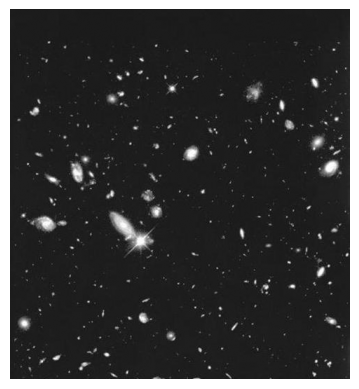

In [32]:
# The image is read and converted to grayscale
IMG_BGR = cv2.imread("Fig0334(a)(hubble-original).tif")
IMG_GRAY = cv2.cvtColor(IMG_BGR, cv2.COLOR_BGR2GRAY)

# Then visualized
plt.axis("off")
plt.imshow(IMG_GRAY, cmap="gray")
plt.show()

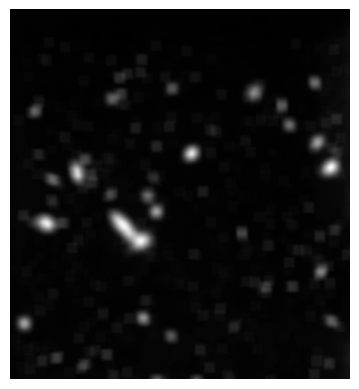

In [33]:
# Now the filter is applied with a kernel size of 15 and visualized
FILTERED_IMG = mean_filter(IMG_GRAY, 15)

plt.axis("off")
plt.imshow(FILTERED_IMG, cmap="gray")
plt.show()

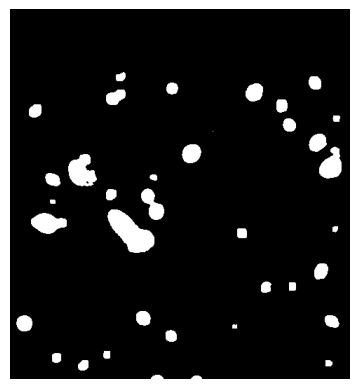

In [34]:
# Now thresholding is applied 
threshold = 0.25 * np.max(FILTERED_IMG)
BINARY_IMG = ((FILTERED_IMG > threshold)*255).astype(np.uint8)

#And visualize the thresholded image
plt.axis("off")
plt.imshow(BINARY_IMG, cmap="gray")
plt.show()

In [35]:
# Now the results are saved in a "results" file
output_path = os.path.join("./results", f"filtered_hubble.png")
cv2.imwrite(output_path, FILTERED_IMG)
output_path = os.path.join("./results", f"threshold_hubble.png")
cv2.imwrite(output_path, BINARY_IMG)

True